In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
num_class=10
batch_size=64
epochs=24
img_rows, img_cols = 28, 28

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
len(y_train)

60000

In [7]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)

In [8]:
input_shape

(28, 28, 1)

In [9]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print('X_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

X_train_shape: (60000, 28, 28, 1)
x_test_shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
y_train=tf.keras.utils.to_categorical(y_train,num_class)
y_test=tf.keras.utils.to_categorical(y_test,num_class)
print(y_train[0:2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# CNN Begins

In [11]:
model=Sequential()

In [12]:
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(num_class,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
hist=model.fit(x_train,y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test,y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7397 - loss: 0.7274 - val_accuracy: 0.8543 - val_loss: 0.3984
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8712 - loss: 0.3530 - val_accuracy: 0.8796 - val_loss: 0.3263
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8931 - loss: 0.2938 - val_accuracy: 0.8801 - val_loss: 0.3246
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9007 - loss: 0.2626 - val_accuracy: 0.8953 - val_loss: 0.2909
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9099 - loss: 0.2421 - val_accuracy: 0.8978 - val_loss: 0.2894
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9185 - loss: 0.2211 - val_accuracy: 0.9020 - val_loss: 0.2652
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9243 - loss: 0.2041 - val_accuracy: 0.9036 - val_loss: 0.2661
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9320 - loss: 0.1838 - val_accuracy: 0

In [15]:
hist.history

{'accuracy': [0.8099499940872192,
  0.8775833249092102,
  0.8931999802589417,
  0.9028666615486145,
  0.9112833142280579,
  0.9176166653633118,
  0.9239000082015991,
  0.9308666586875916,
  0.9350833296775818,
  0.9405333399772644,
  0.9444166421890259,
  0.9479166865348816,
  0.9528833627700806,
  0.9573500156402588,
  0.9600499868392944,
  0.9641500115394592,
  0.9670166373252869,
  0.9685333371162415,
  0.9724500179290771,
  0.9733833074569702,
  0.975766658782959,
  0.977233350276947,
  0.9797000288963318,
  0.9807500243186951],
 'loss': [0.5209828019142151,
  0.3386232852935791,
  0.2922956347465515,
  0.26217398047447205,
  0.24015335738658905,
  0.22232632339000702,
  0.20410726964473724,
  0.18666371703147888,
  0.17244890332221985,
  0.15844745934009552,
  0.1486188769340515,
  0.135532945394516,
  0.12376804649829865,
  0.1135699450969696,
  0.10592124611139297,
  0.09496290981769562,
  0.08820810914039612,
  0.08168170601129532,
  0.07275501638650894,
  0.07075373828411102,


Test loss: 0.4176832437515259
Test accuracy: 0.9136999845504761


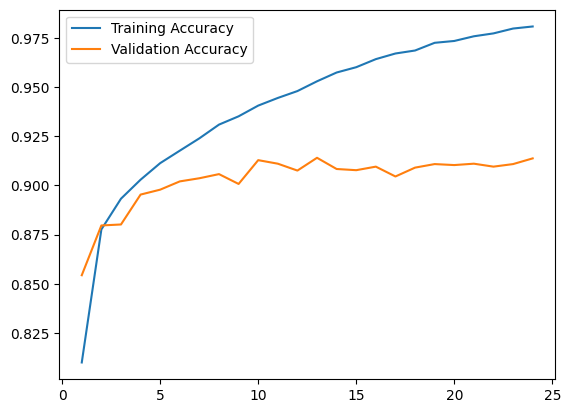

In [17]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
epoch_list=list(range(1,len(hist.history['accuracy'])+1))
plt.plot(epoch_list,hist.history['accuracy'],epoch_list,hist.history['val_accuracy'])
plt.legend(('Training Accuracy','Validation Accuracy'))
plt.show()

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)